# Practica 1 APC: Graduate Admission 2
## Predicting admission from important parameters

- #### Bruno Moya Ruiz - 1568176
- #### Marc Garrofé Urrutia - 1565644
- #### Martí Simon Rojas - 1568180

# Apartat (C): Analitzant Dades
En aquest apartat analitzarem la nostra base de dades. Volem primer separar el input (X) del output (Y). En el nostre cas tenim 9 variables, de les quals la ultima es el nostre output, es a dir el resultat que volem obtenir del nostre model.

In [124]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('data/Admission_Predict_Ver1.1.csv')
data = dataset.values

x = data[:, 1:8] #no agafem el primer atribut serial number.
y = data[:, 8]
index = dataset.columns[1:8]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (500, 9)
Dimensionalitat de les entrades X (500, 7)
Dimensionalitat de l'atribut Y (500,)


D'aqui veiem que la nostra base de dades presenta 500 elements. Ara mirarem si presenta valors no existents, es a dir que el seu valor sigui NaN. Aquests valors poden fer variar el resultat del nostre model i és important tenir-los en compte.

In [125]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Podem observar com el nostre dataset no presenta cap valor NaN.

In [126]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500,4.500,9.650,1,0.920
1,2,324,107,4,4.000,4.500,8.870,1,0.760
2,3,316,104,3,3.000,3.500,8.000,1,0.720
3,4,322,110,3,3.500,2.500,8.670,1,0.800
4,5,314,103,2,2.000,3.000,8.210,0,0.650


Podem observar estadístiques de la nostra base de dades, com la desviació standard d'aquesta (std) , la mitjana de cada variable (mean) entre altres. Aixó ens serveix per descobrir quina distribució segueix cada variable i el seu tipus.

In [127]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,250.500,316.472,107.192,3.114,3.374,3.484,8.576,0.560,0.722
std,144.482,11.295,6.082,1.144,0.991,0.925,0.605,0.497,0.141
min,1.000,290.000,92.000,1.000,1.000,1.000,6.800,0.000,0.340
25%,125.750,308.000,103.000,2.000,2.500,3.000,8.127,0.000,0.630
50%,250.500,317.000,107.000,3.000,3.500,3.500,8.560,1.000,0.720
75%,375.250,325.000,112.000,4.000,4.000,4.000,9.040,1.000,0.820
max,500.000,340.000,120.000,5.000,5.000,5.000,9.920,1.000,0.970


Podem mostrar algun atribut del nostre dataset en format de grafica. En aquest cas mostrarem la atribut 0 (Serial No.)

<IPython.core.display.Javascript object>


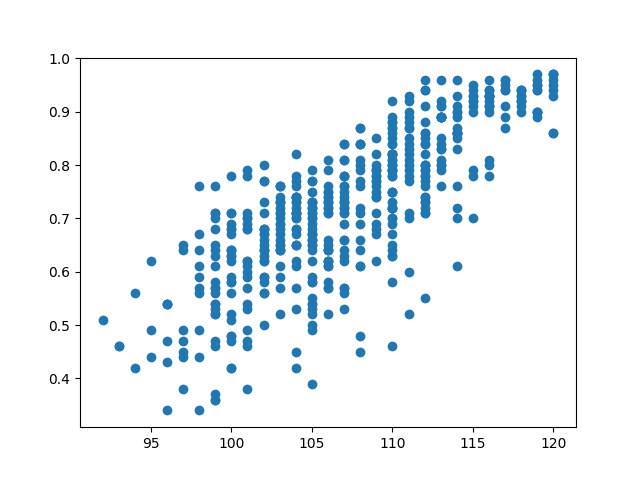

In [128]:
# mostrem atribut 0
plt.figure()

ax = plt.scatter(x[:,1], y)

<IPython.core.display.Javascript object>


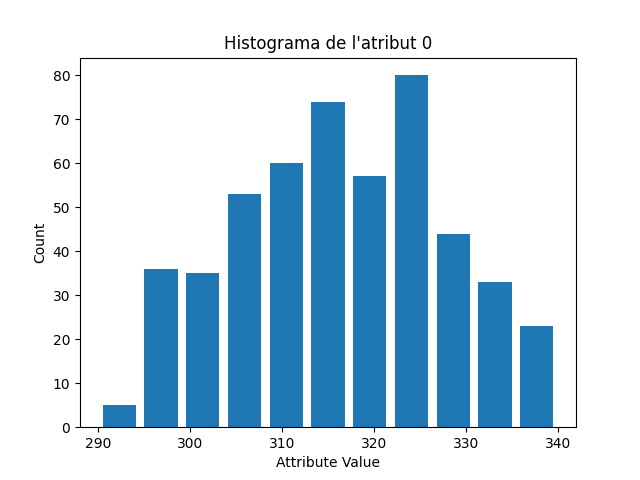

In [129]:
plt.figure()
plt.title("Histograma de l'atribut 0")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,0], bins=11, range=[np.min(x[:,0]), np.max(x[:,0])], histtype="bar", rwidth=0.8)


Aquest histograma ens permet observar si presenta una distribució Gaussiana. Per exemple, el nostre atribut 0 presenta una distribució Gaussiana. També podem estudiar la correlació entre els diferents atributs per tal de saber si estan correlacionats entre ells. Aixo ens sera util per observar quins atributs tenen més pes.

<IPython.core.display.Javascript object>


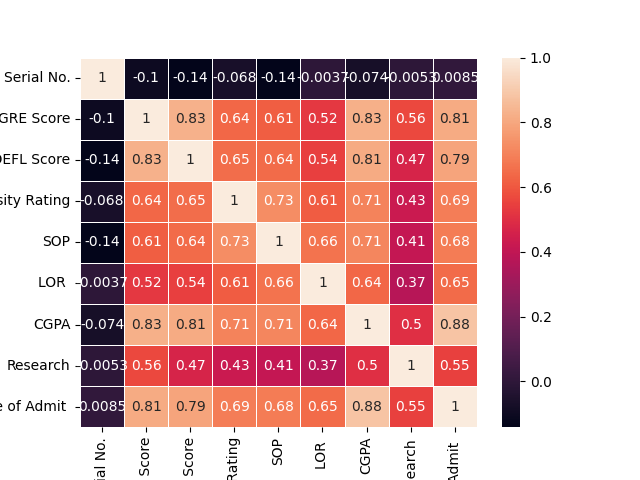

In [130]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Podem observar pel heatmap, que gariebe tots els atributs estan relacionats amb un grau per sobre del 65% amb el nostre output menys el atribut research i serial number (que és un index) que son els menys relacionats, i per tant potser un dels possibles a descartar en un futur. També podem utilitzar la funció pairplot per tal de veure els atributs que estan relacionats entre si. Pero la relació que ens interessa observar es la dels atributs amb l'ultim atribut ja que es la sortida, podent així observar quin atribut esta més relacionat amb la sortida.

<IPython.core.display.Javascript object>


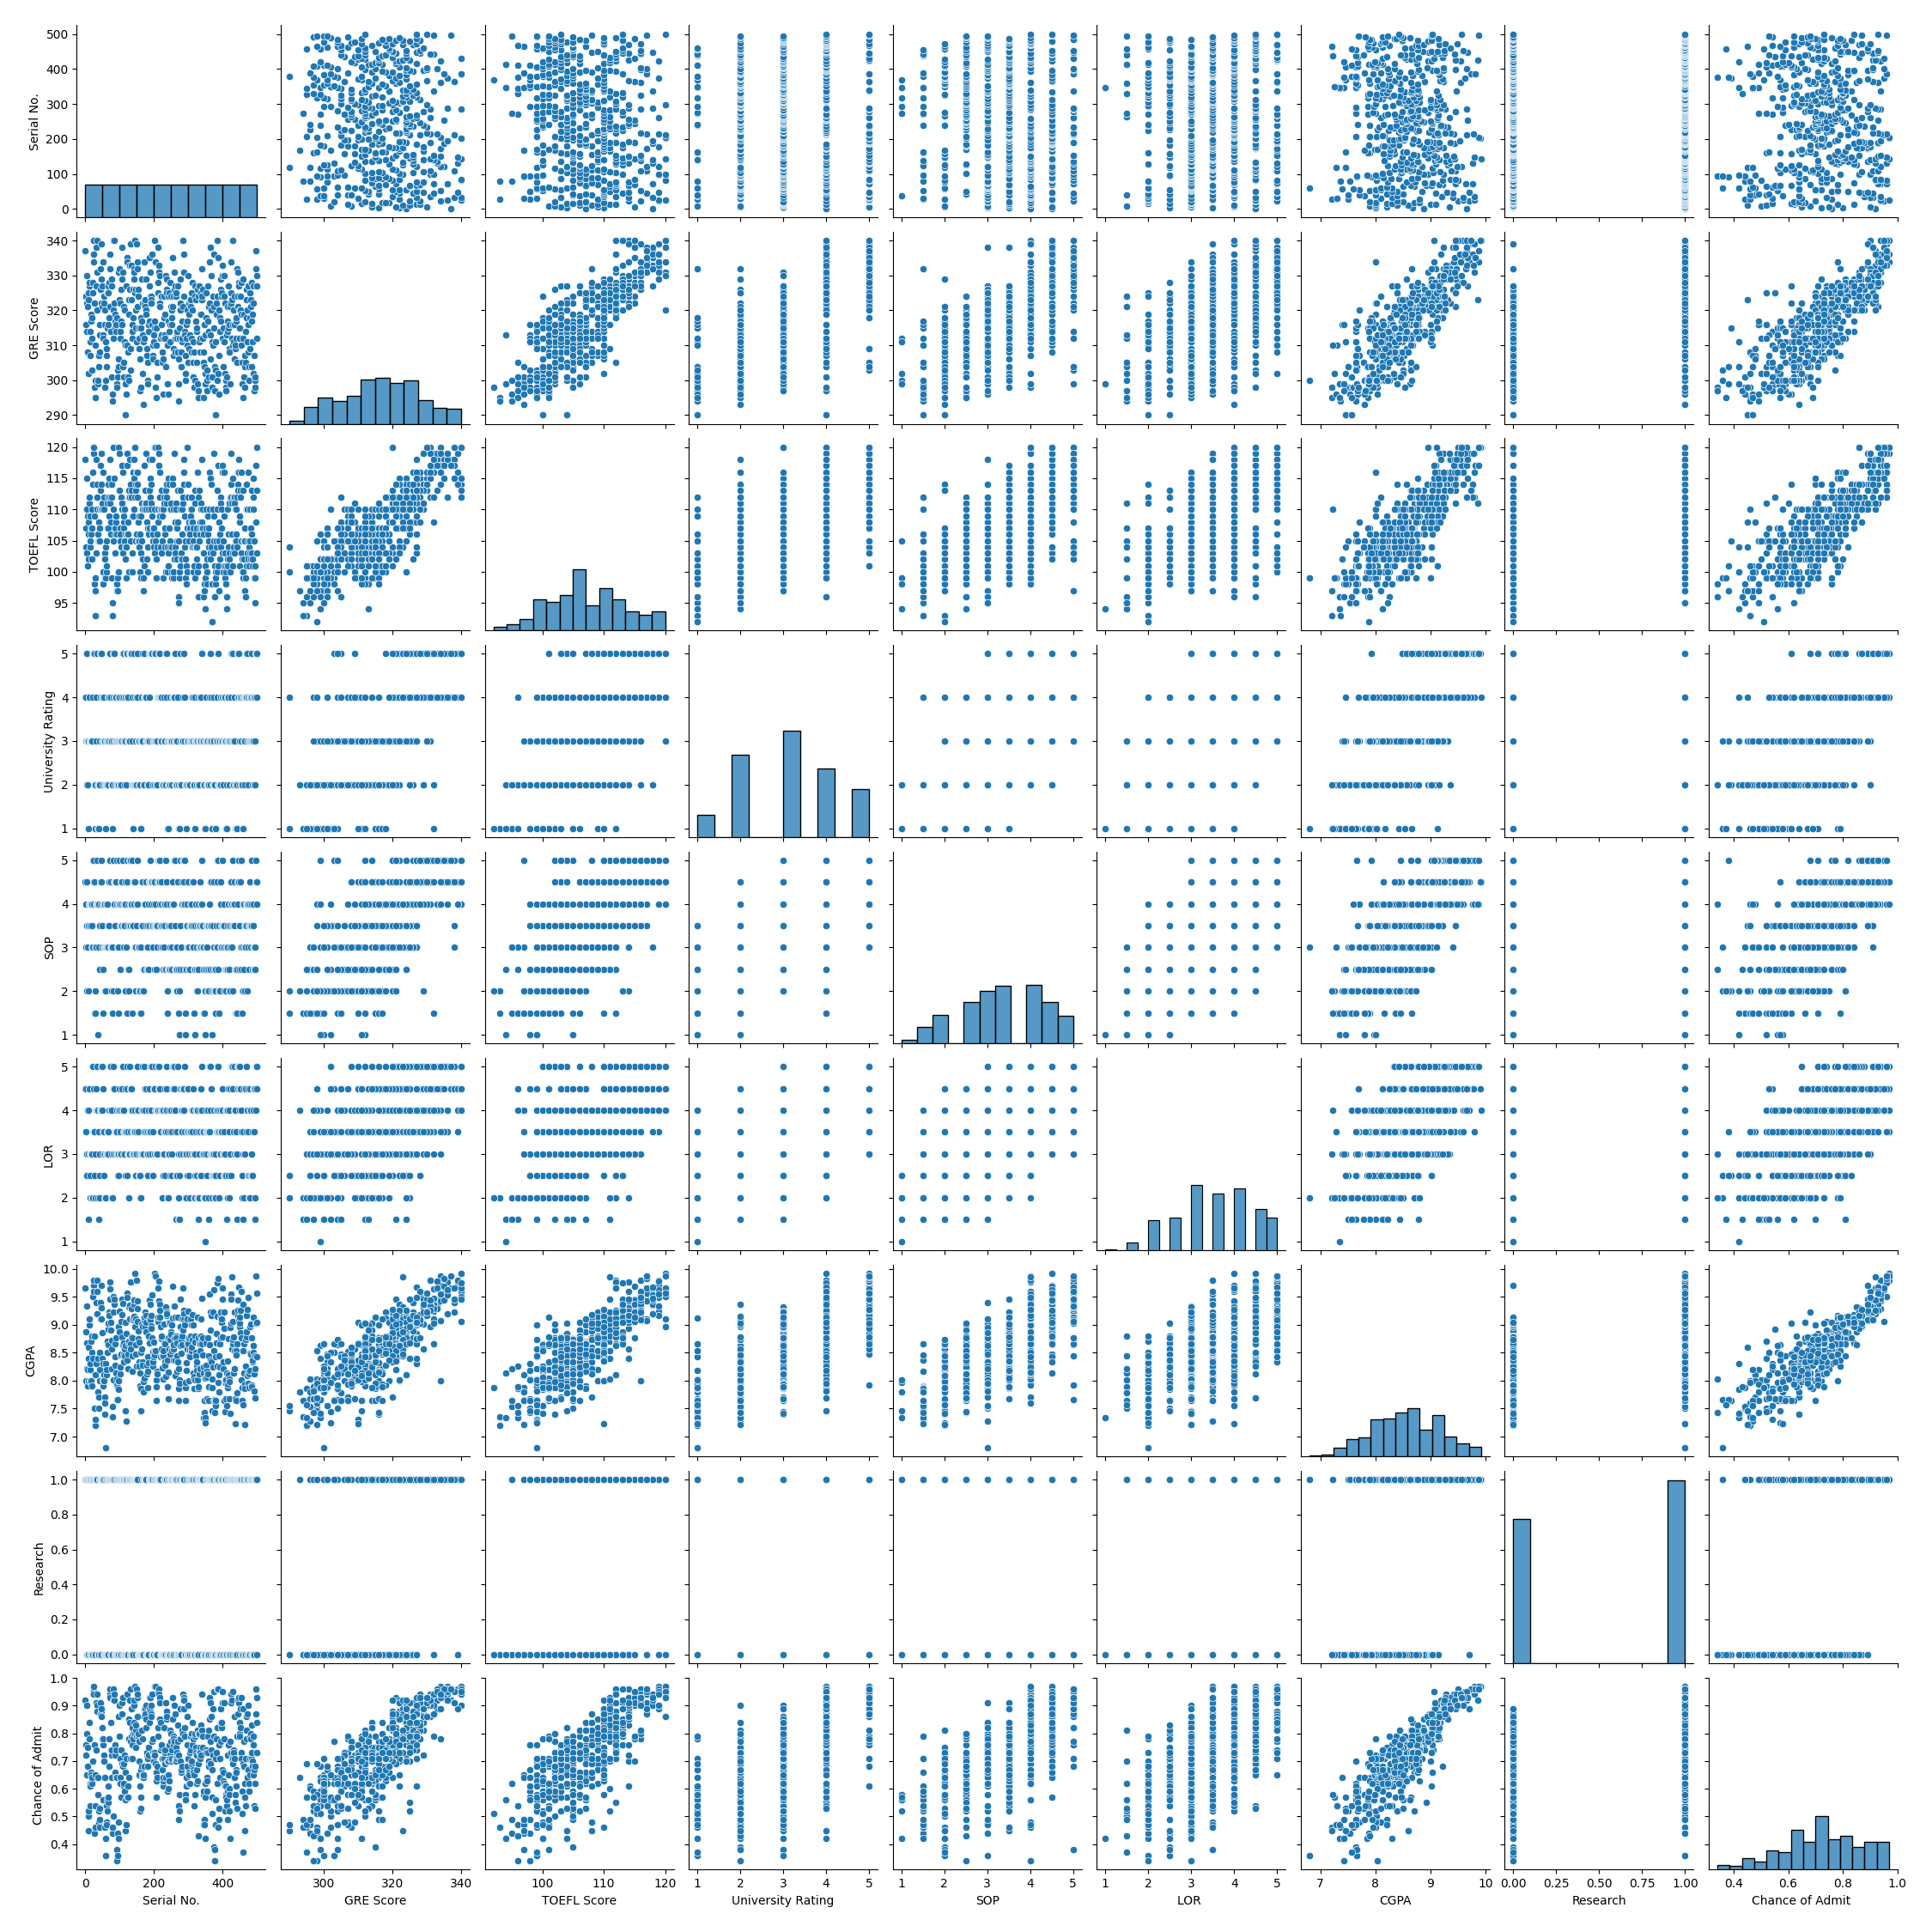

In [131]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset)

Així doncs ara podreu respondre a les següents preguntes:

Quin és el tipus de cada atribut?

- Serial No.: Numeros enters entre 0 i 500 
- GRE Score : Numeros enters entre 290 i 340 
- TOEFL Score : Numeros enters entre 92 i 120 
- University Rating : Numeros enters entre 1 i 5 
- SOP : Numeros enters entre 1 i 5
- LOR : Numeros enters entre 1 i 5
- CGPA : Numeros decimals entre 6.8 i 9.92
- Research : Numero binari, 0 i 1
- Chance of Admit : Percentatge entre 0 i 100% 

Quins atributs tenen una distribució Guassiana?

Podem observar per les grafiques de barres que els atributs amb distribució Gaussiana son:

- GRE Score
- TOEFL Score
- University Rating
- CGPA

Quin és l'atribut objectiu? Per què?
- El nostre objectiu es predir el tant percent de possibilitat d'admissió a la universitat en la India. Per tant podem dir que la nostra variable objectiu a predir sera la ultima, Chance of Admit. 

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

Per a agilitzar els càlculs es recomana utilitzar la llibreria numpy. Aquesta llibreria ens permet processar vectors sencers a la vegada de manera eficient i en paral·lel. Exemple:

In [132]:
import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')

vector1 = np.array([1,2,3,4]) # convertim llista de python a numpy array
vector2 = np.array([1,2,1,4]) 

# podem sumar dos vectors element a element
print("Suma vector1 + vector2 ", vector1 + vector2)

# podem sumar tots els valors d'un vector
print("Suma valors vector1 ", vector1.sum())

# calculem la mitjana
print("Mitjana vector1", vector1.mean())

# utilitzem un vector com a índex de l'altre
# vector3 = vector1  # necesitem fer una copia del vector per no modificar el original
vector3 = vector1.copy()
vector3[vector2 == 1] = 5
print("Vector1 amb un 5 on el Vector2 te 1s ", vector3)

# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

print("MSE: ", mse(vector1, vector2))

Suma vector1 + vector2  [2 4 4 8]
Suma valors vector1  10
Mitjana vector1 2.5
Vector1 amb un 5 on el Vector2 te 1s  [5 2 5 4]
MSE:  1.0


Per a la regressió podeu utilitzar la llibreria sklearn:

In [133]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

Primer estandaritzarem les nostres dades del dataset.

In [134]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x_t = standarize(x)

<IPython.core.display.Javascript object>


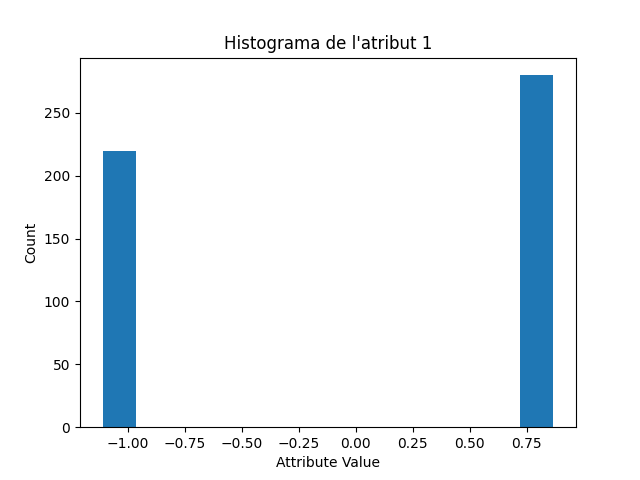

In [135]:
plt.figure()
plt.title("Histograma de l'atribut 1")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x_t[:,6], bins=11, range=[np.min(x_t[:,6]), np.max(x_t[:,6])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


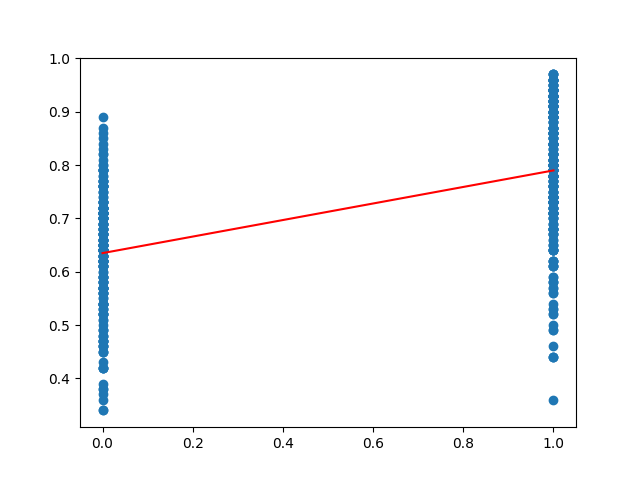

Mean squeared error:  0.013956795649350649
R2 score:  0.2979751808158796


In [136]:
from sklearn.metrics import r2_score

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,6].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,6], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


Un cop mostrats de manera adient, (en forma de taula, i/o de gràfics si la dimensionalitat ho permet) els resultats aconseguits amb la regressió, avaluarem de manera independent la idonietat de cadascun dels atributs.

In [146]:
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))
    
    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %s (%d): %f" %(str(index[i]), i, error))
    print("R2 score en atribut %s (%d): %f" %(str(index[i]), i, r2))


Error en atribut GRE Score (0): 0.005609
R2 score en atribut GRE Score (0): 0.680339
Error en atribut TOEFL Score (1): 0.006690
R2 score en atribut TOEFL Score (1): 0.618705
Error en atribut University Rating (2): 0.008516
R2 score en atribut University Rating (2): 0.514677
Error en atribut SOP (3): 0.007643
R2 score en atribut SOP (3): 0.564435
Error en atribut LOR  (4): 0.011842
R2 score en atribut LOR  (4): 0.325123
Error en atribut CGPA (5): 0.004347
R2 score en atribut CGPA (5): 0.752239
Error en atribut Research (6): 0.012273
R2 score en atribut Research (6): 0.300569


Ara observarem com canvia un cop hem estandaritzat les dades

In [147]:
for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))
    
    x_t = standarize(x_t) #estandaratizem les dades de train del atribut i 
    x_v = standarize(x_v) #estandaratizem les dades de validacio del atribut i 
    
    
    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %s (%d): %f" %(str(index[i]), i, error))
    print("R2 score en atribut %s (%d): %f" %(str(index[i]), i, r2))

Error en atribut GRE Score (0): 0.005501
R2 score en atribut GRE Score (0): 0.686467
Error en atribut TOEFL Score (1): 0.006595
R2 score en atribut TOEFL Score (1): 0.624115
Error en atribut University Rating (2): 0.008556
R2 score en atribut University Rating (2): 0.512395
Error en atribut SOP (3): 0.007721
R2 score en atribut SOP (3): 0.559997
Error en atribut LOR  (4): 0.011647
R2 score en atribut LOR  (4): 0.336210
Error en atribut CGPA (5): 0.004376
R2 score en atribut CGPA (5): 0.750595
Error en atribut Research (6): 0.012306
R2 score en atribut Research (6): 0.298682
